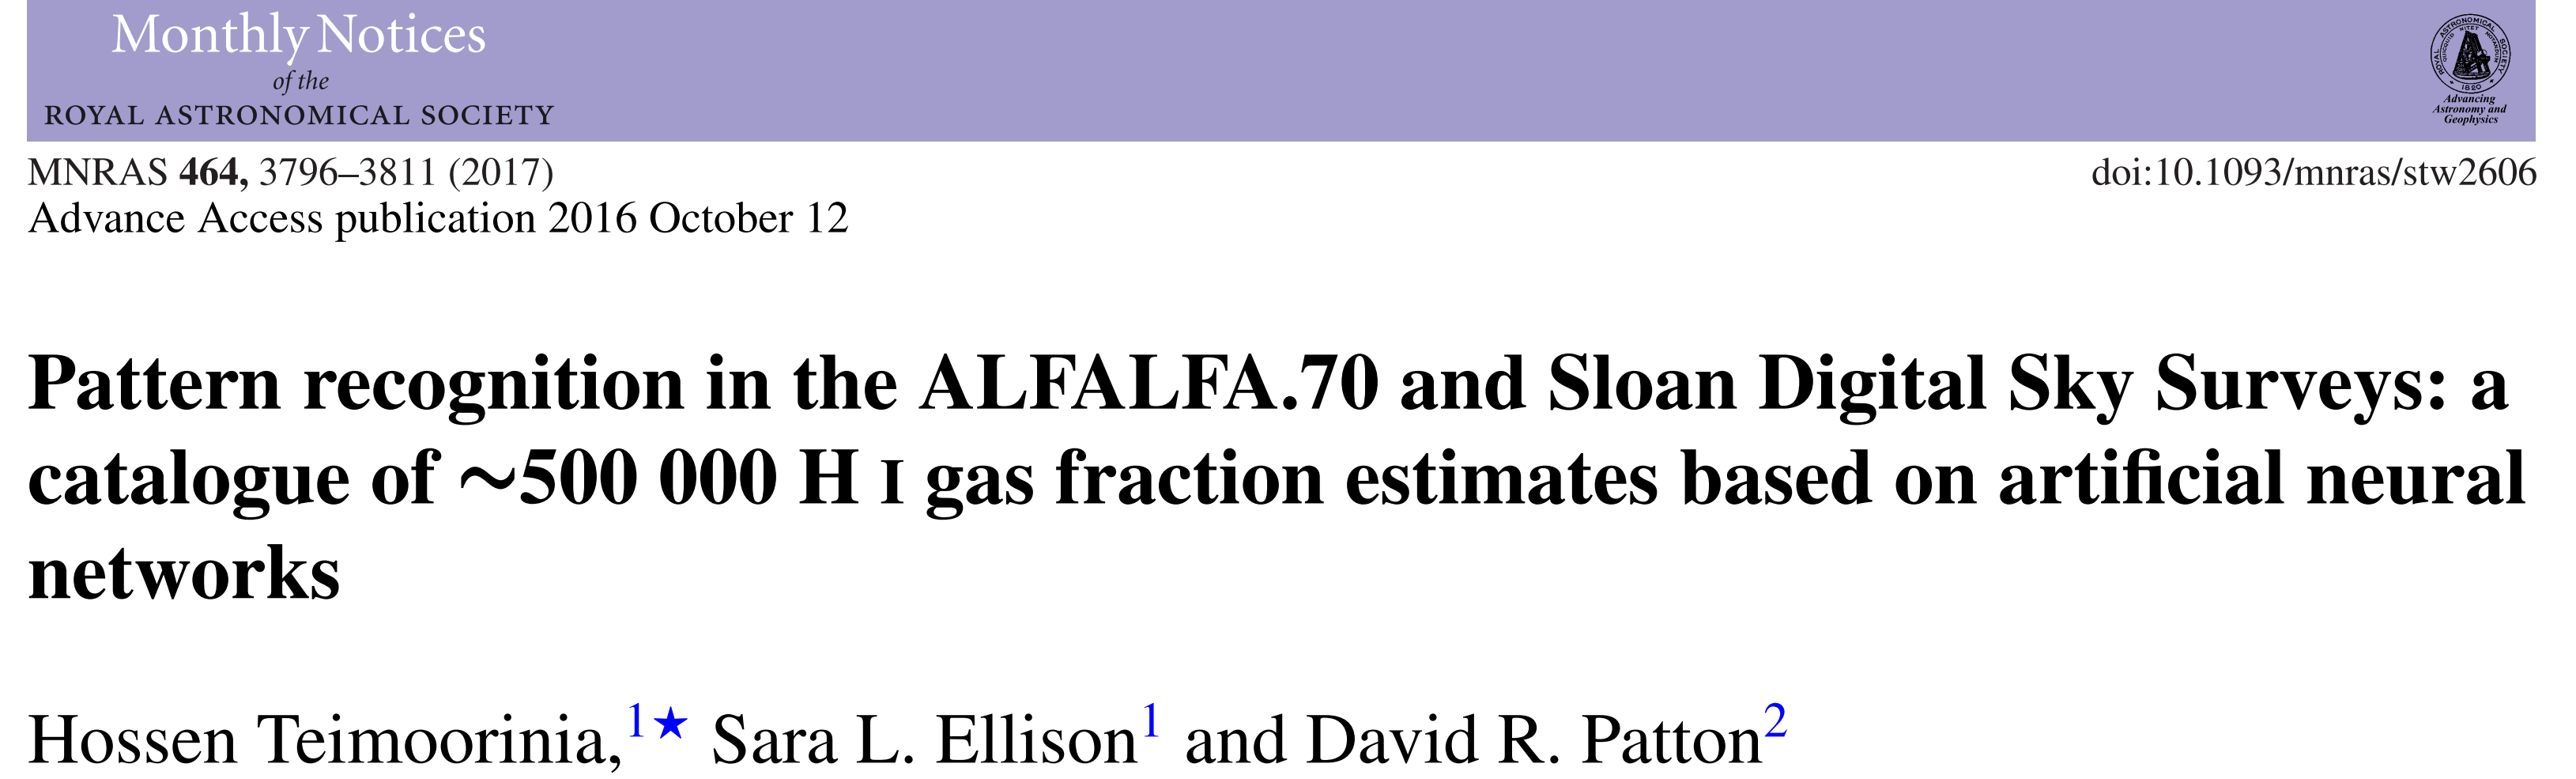

# Loading packages

In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
print('Done!')



Done!


In [2]:
X=np.load('inp_alfalfa.npy')  # load the input
Y=np.load('tar_alfalfa.npy')  # load the target

print ('Done!')

Done!


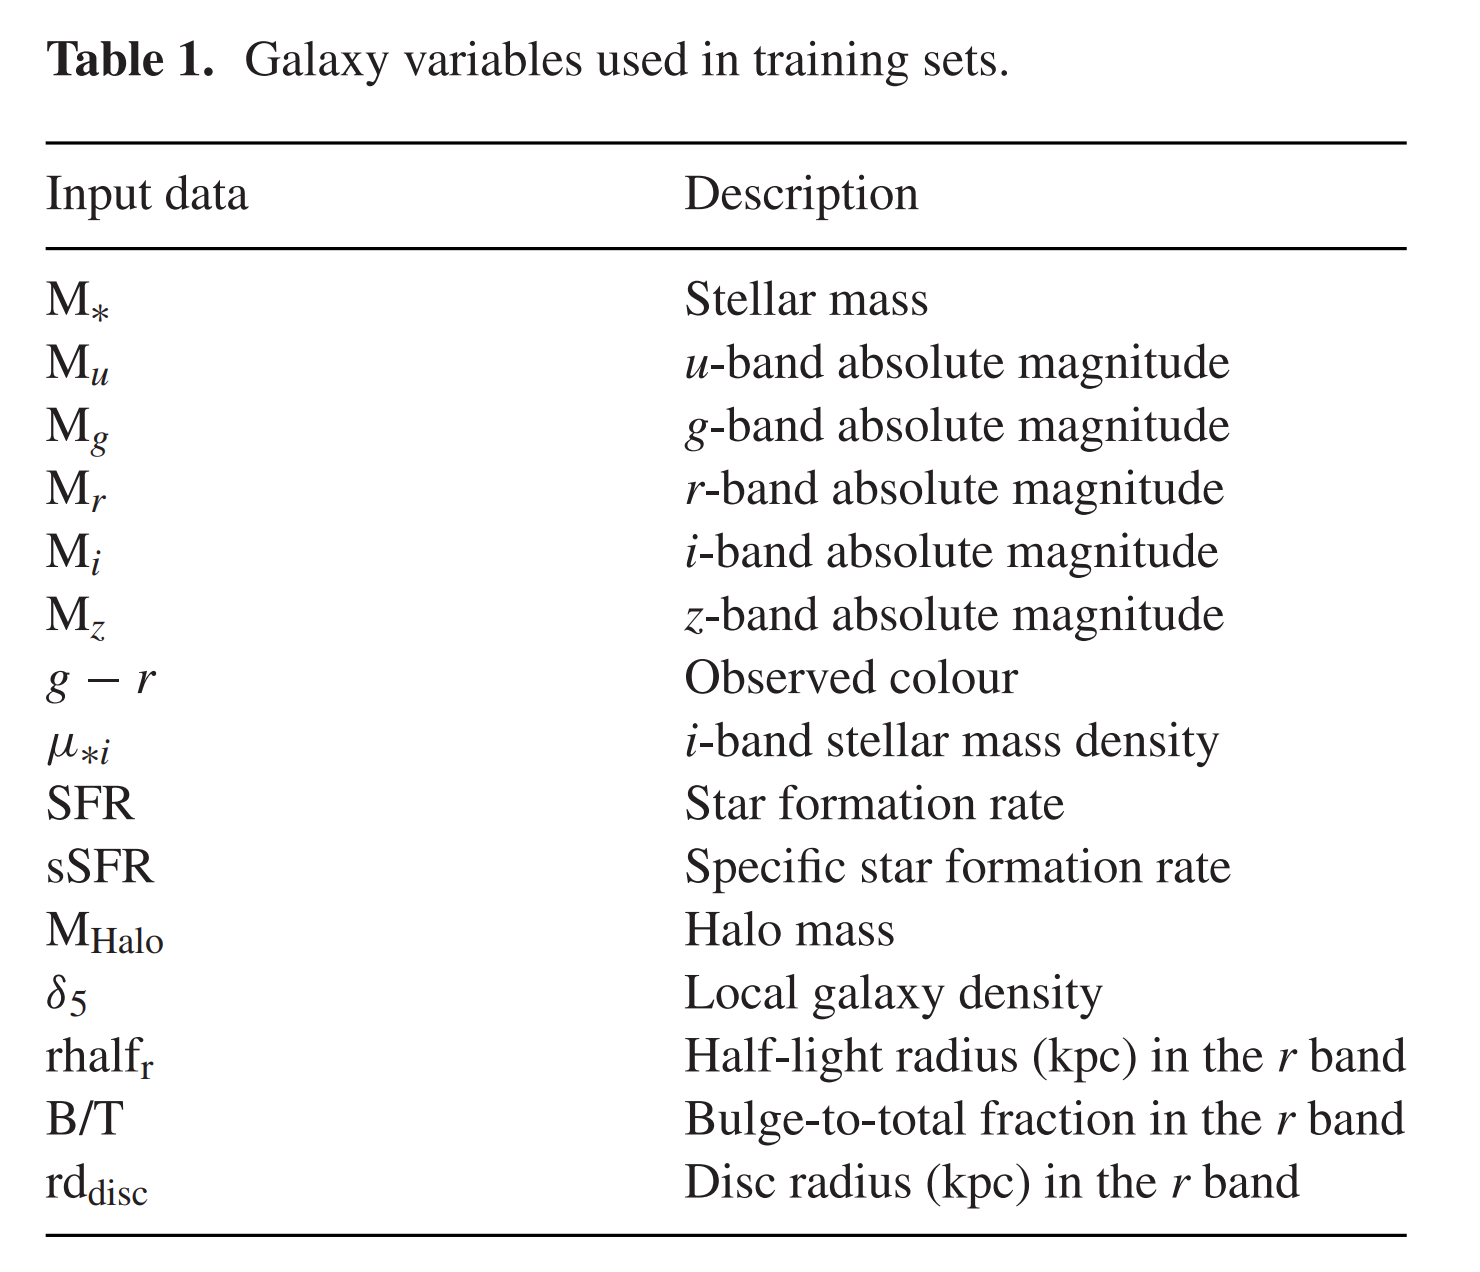

In [3]:
print(np.shape(X),np.shape(Y)) #Check the size and dimension of the input and the target


(13674, 15) (13674,)


In [4]:
#Y = np.reshape(Y, (-1, 1))

In [5]:
#print(np.shape(X),np.shape(Y))

# Exploring the data and seeing the distribution of a selected column

Text(0.5, 0, 'X3')

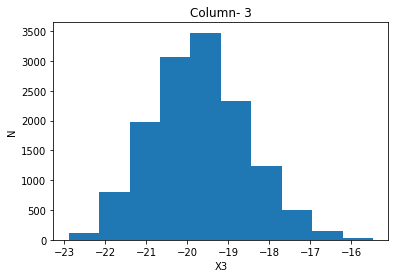

In [4]:
# Choose a column to see the distribution

n_column =3

plt.hist(X[:,n_column])
plt.title('Column- '+str(n_column))
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

# Randomly separate  samples to the training set (75%) and validation set (25%). The corresponding targets are also separated. 

In [5]:
from sklearn.model_selection import train_test_split

X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.25 )

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

training set ==  (10255, 15) (10255,) ,, validation set ==  (3419, 15) (3419,)


# Normalization.


In [6]:
#Line #1: Import a model, for normalization, like StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

#Line #2: fitting (finding the parameters of the model based on the training set). Assign a name (scaler_S which can transform a new data after training)

#Line #3: Predicted (transformed) values for the training set

#Line #4: Predicted (transformed) values for the validation set (using the model that has been trained using the training set).


 

scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

print('Done!')

Done!


# Comparing the distributions from the nomalized training and validation sets

Text(0.5, 0, 'X3')

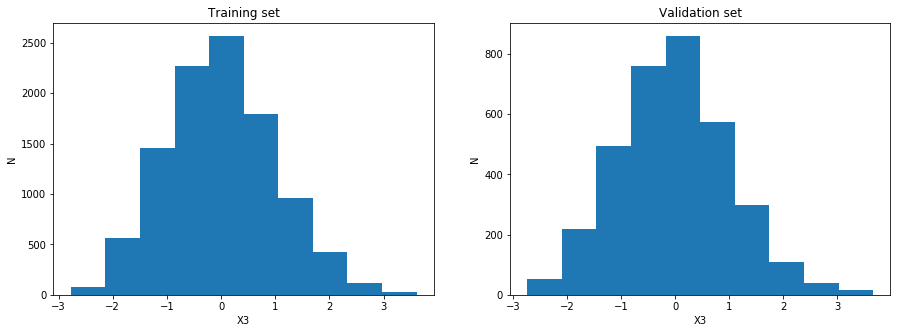

In [7]:
n_column = 3

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(X_tr_Norm[:,n_column])
plt.title('Training set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))


plt.subplot(1, 2, 2)
plt.hist(X_va_Norm[:,n_column])
plt.title('Validation set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

In [10]:
# Change the shape of the target (if you have a one-component  target )
# Y=np.reshape(Y,-1)
# print(np.shape(X),np.shape(Y))   

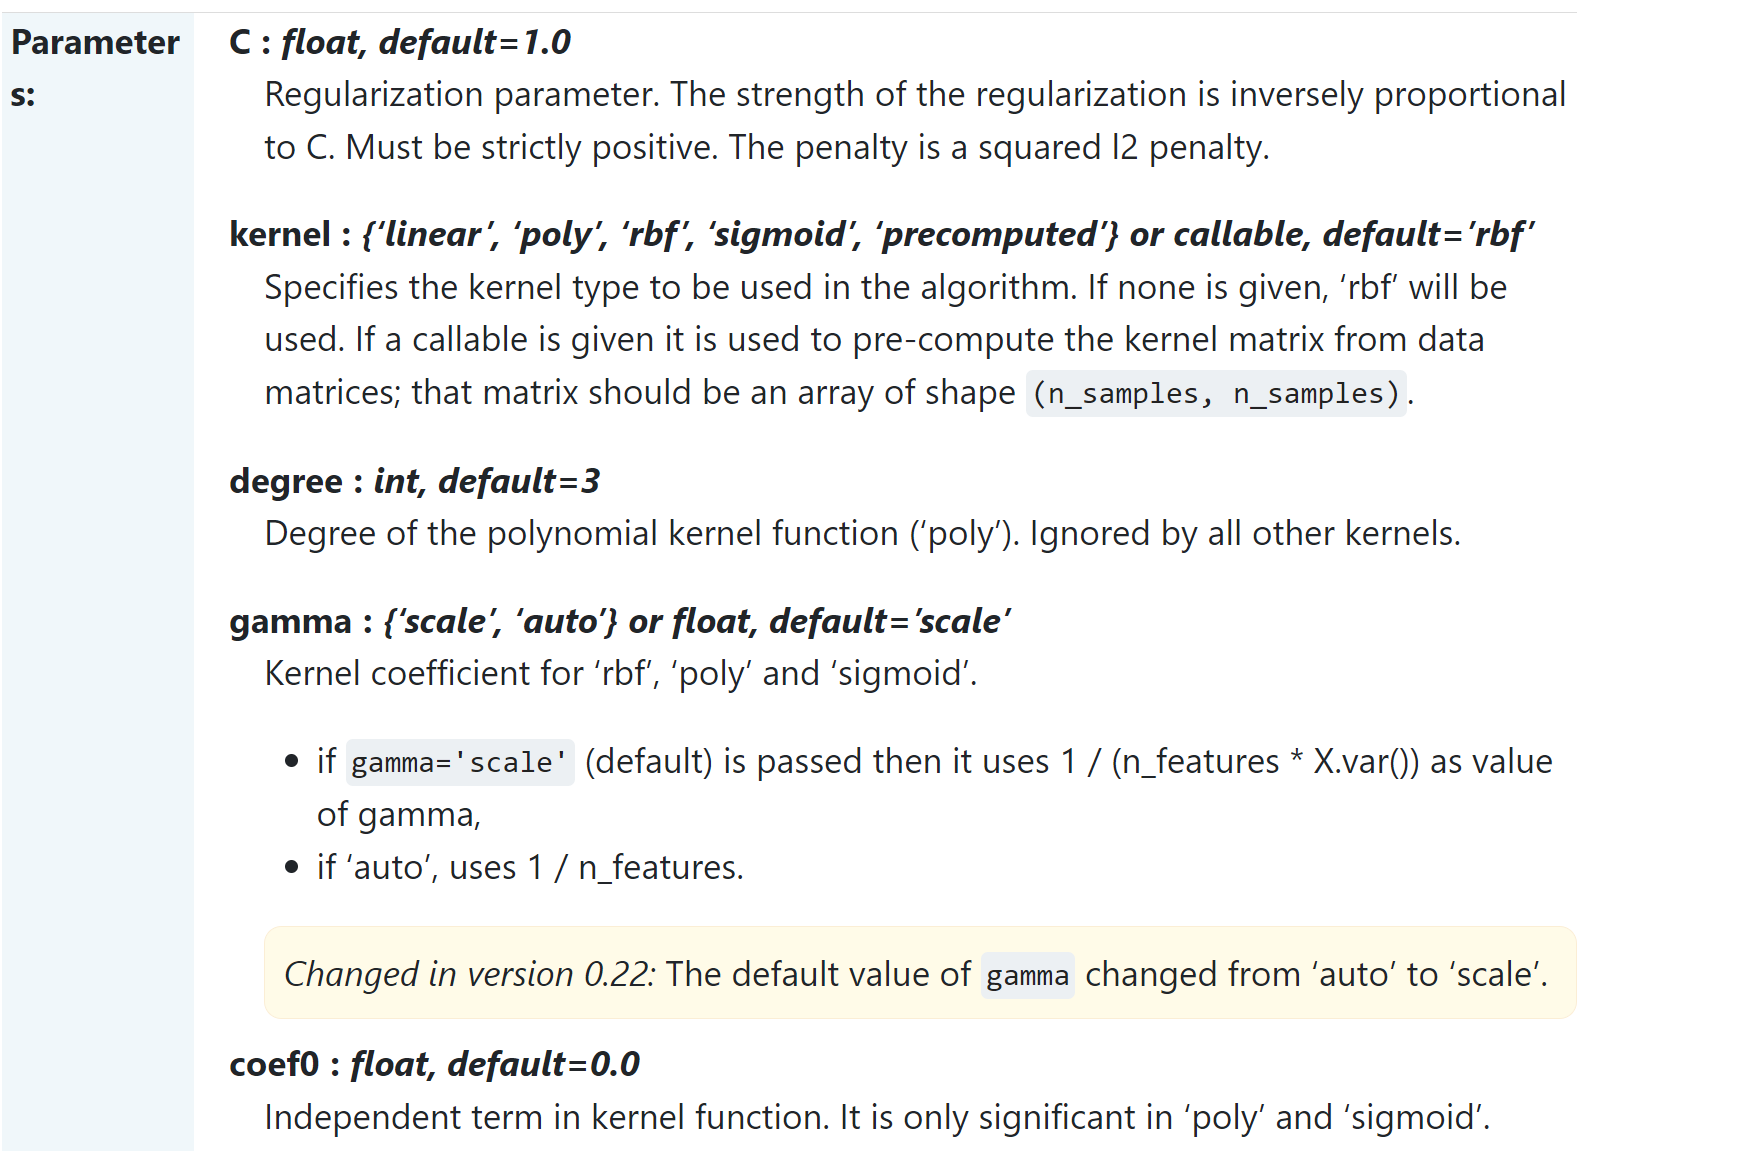

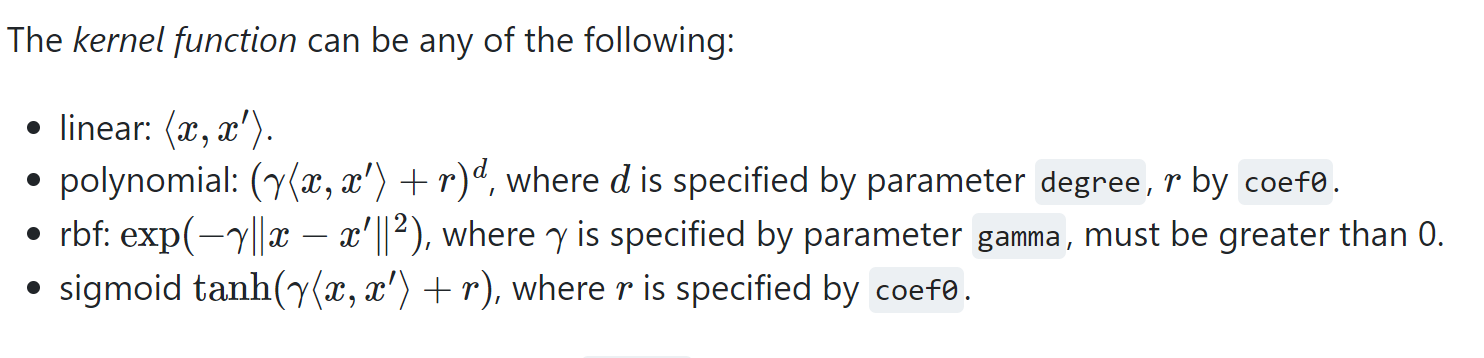

For more information:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [31]:

    
from sklearn.svm import SVC    




cls= SVC(C=100.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=True)



cls.fit (X_tr_Norm,Y_tr)  # fit the model with training set



## predict the response for tr and va sets. We can have two outputs: probability (e.g.,Y_tr_prob ) and  the winner class (e.g.,Y_tr):
Y_tr_prob = cls.predict_proba(X_tr_Norm)[:,1]
Y_tr_pred = cls.predict(X_tr_Norm)

Y_va_prob = cls.predict_proba(X_va_Norm)[:,1]
Y_va_pred = cls.predict(X_va_Norm)


idx_tr_1 = (Y_tr==1)
idx_tr_0 = (Y_tr==0)


idx_va_1 = (Y_va==1)
idx_va_0 = (Y_va==0)









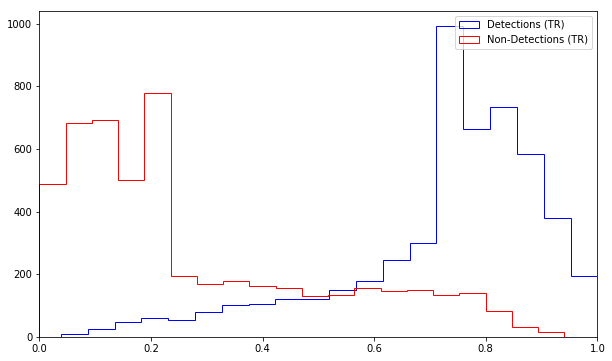

In [32]:
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_1],20,histtype='step',color = "blue", label='Detections (TR)')

plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_tr_prob[idx_tr_0],20,histtype='step',color = "red",label='Non-Detections (TR)')

plt.xlim([0,1])

plt.legend()

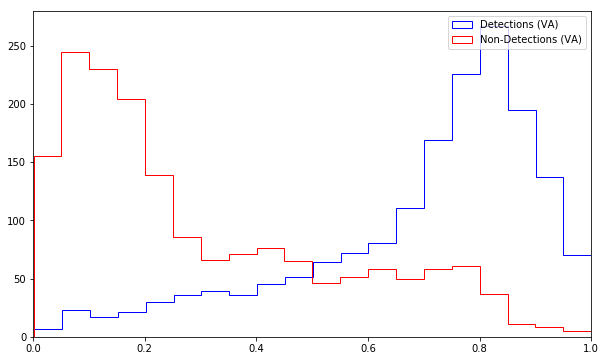

In [33]:
plt.figure(figsize=(10, 6))

plt.figure(1)
plt.hist(Y_va_prob[idx_va_1],20,histtype='step',color = "blue", label='Detections (VA)')

plt.xlim([0,1])
plt.legend()


plt.figure(1)
plt.hist(Y_va_prob[idx_va_0],20,histtype='step',color = "red",label='Non-Detections (VA)')

plt.xlim([0,1])

plt.legend()

Text(0.5, 1.0, 'AUC Training')

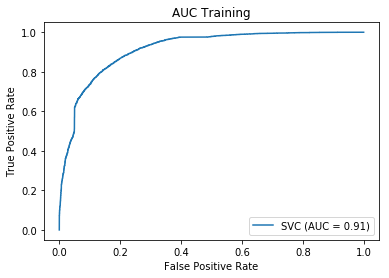

In [34]:

metrics.plot_roc_curve(cls, X_tr_Norm, Y_tr)
plt.title('AUC Training')

Text(0.5, 1.0, 'AUC Validation')

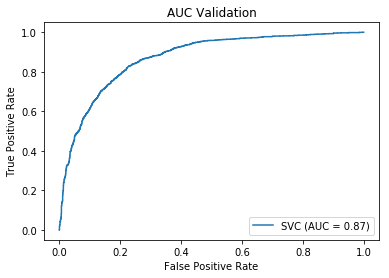

In [35]:
metrics.plot_roc_curve(cls, X_va_Norm, Y_va)
plt.title('AUC Validation')

Text(0.5, 1.0, 'TR')

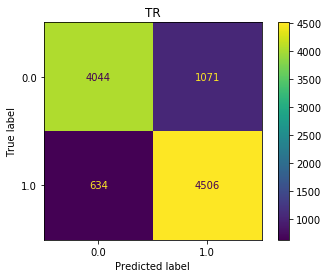

In [36]:

plot_confusion_matrix(cls, X_tr_Norm, Y_tr) 
plt.title('TR')

Text(0.5, 1.0, 'VA')

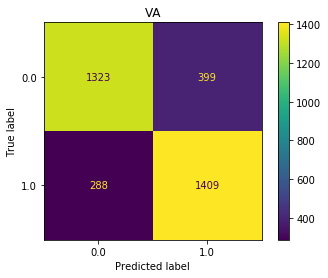

In [37]:

plot_confusion_matrix(cls, X_va_Norm, Y_va) 
plt.title('VA')

Text(0.5, 1.0, 'TR, Normalized')

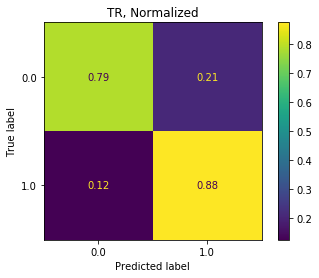

In [38]:
plot_confusion_matrix(cls, X_tr_Norm, Y_tr,normalize='true') 
plt.title('TR, Normalized')

Text(0.5, 1.0, 'VA, Normalized')

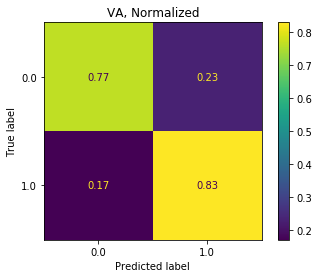

In [39]:
plot_confusion_matrix(cls, X_va_Norm, Y_va,normalize='true') 
plt.title('VA, Normalized')

In [40]:
print ("Recall (TR) = ", metrics.recall_score(Y_tr, Y_tr_pred))
print ("Recall (VA) = ", metrics.recall_score(Y_va, Y_va_pred))


Recall (TR) =  0.8766536964980545
Recall (VA) =  0.8302887448438421


In [41]:
print ("Accuracy (TR) = ", metrics.accuracy_score(Y_tr, Y_tr_pred))
print ("Accuracy (VA) = ", metrics.accuracy_score(Y_va, Y_va_pred))



Accuracy (TR) =  0.8337396392003901
Accuracy (VA) =  0.7990640538169055


In [42]:
print ("Precision (TR) = ", metrics.precision_score(Y_tr, Y_tr_pred))
print ("Precision (VA) = ", metrics.precision_score(Y_va, Y_va_pred))


Precision (TR) =  0.807961269499731
Precision (VA) =  0.7793141592920354
